###  <font color='lightblue'>***1. EDA***
Debemos implementar un modelo que nos permita predecir la cantidad de bicicletas que se alquilan según la información contenida en el dataset (bike_train.xlsx) puesto a disposición en Washignton DC.
Como primer paso vamos a realizar un analisis exploratorio tratando de graficar los componentes de la serie
Como primer paso convertimos el excel a csv para importarlo. </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [43]:
dt_bikes = pd.read_csv('./bike_train.csv')

In [44]:
dt_bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [45]:
dt_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     11999 non-null  int64  
 1   dteday      11999 non-null  object 
 2   season      11999 non-null  int64  
 3   yr          11999 non-null  int64  
 4   mnth        11999 non-null  int64  
 5   hr          11999 non-null  int64  
 6   holiday     11999 non-null  int64  
 7   weekday     11999 non-null  int64  
 8   workingday  11999 non-null  int64  
 9   weathersit  11999 non-null  int64  
 10  temp        11999 non-null  float64
 11  atemp       11999 non-null  float64
 12  hum         11999 non-null  float64
 13  windspeed   11999 non-null  float64
 14  casual      11999 non-null  int64  
 15  registered  11999 non-null  int64  
 16  cnt         11999 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.6+ MB


### <font color='lightblue'>El dataset NO tiene la columna 'dteday' del tipo date. Vamos a convertirlo utilizando la hora como parte de la fecha</font>

In [46]:
dt_bikes['dteday'] = pd.to_datetime(dt_bikes['dteday'].astype(str)+' '+dt_bikes['hr'].astype(str)+':'+'00')

In [47]:
dt_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

### <font color='lightblue'>Para realizar el analisis de serie de tiempovamos a utilizar esa fecha como indice</font>

In [48]:
dt_bikes = dt_bikes.set_index('dteday')

In [49]:
dt_bikes.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### <font color='lightblue'>Tenemos 2 años de informacion por hora</font>

In [50]:
dt_bikes.index.year.max()-dt_bikes.index.year.min()

1

### <font color='lightblue'>Visualizamos la serie</font>

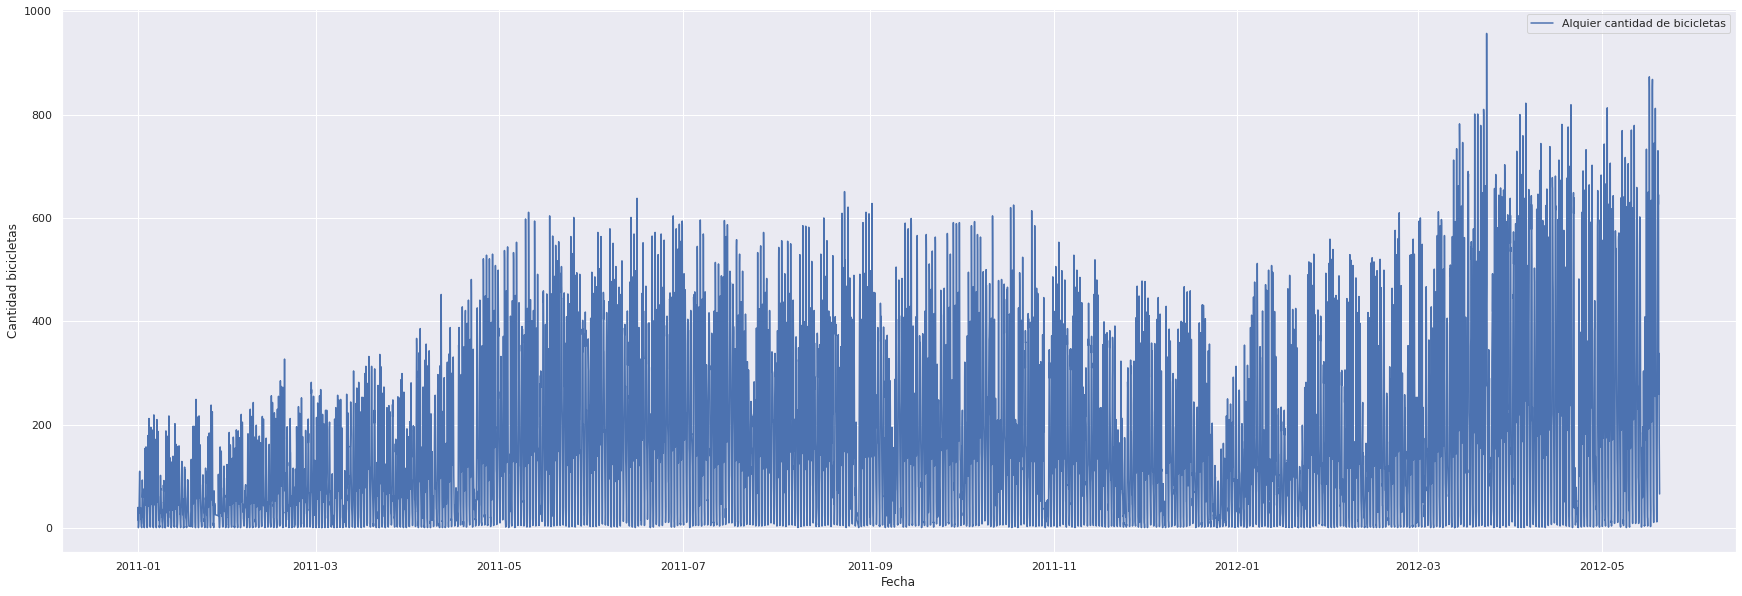

In [51]:
plt.figure(figsize=(30, 10))
plt.plot(dt_bikes.index, dt_bikes.cnt, label='Alquier cantidad de bicicletas')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad bicicletas')
plt.show()

### <font color='lightblue'>Componentes de la serie de tiempo

Analizamos dos maneras: la media movil y regresion lineal.


***Meida móvil***

Usamos la funcion rolling window. Determino una venta de registros anteriores + actual para realizar el promedio en la fila actual
</font>




In [52]:
ventana = (24)
dt_bikes_tendencia = dt_bikes.cnt.rolling(window = ventana, center = True).mean()
dt_bikes_tendencia

dteday
2011-01-01 00:00:00   NaN
2011-01-01 01:00:00   NaN
2011-01-01 02:00:00   NaN
2011-01-01 03:00:00   NaN
2011-01-01 04:00:00   NaN
                       ..
2012-05-19 23:00:00   NaN
2012-05-20 00:00:00   NaN
2012-05-20 01:00:00   NaN
2012-05-20 02:00:00   NaN
2012-05-20 03:00:00   NaN
Name: cnt, Length: 11999, dtype: float64

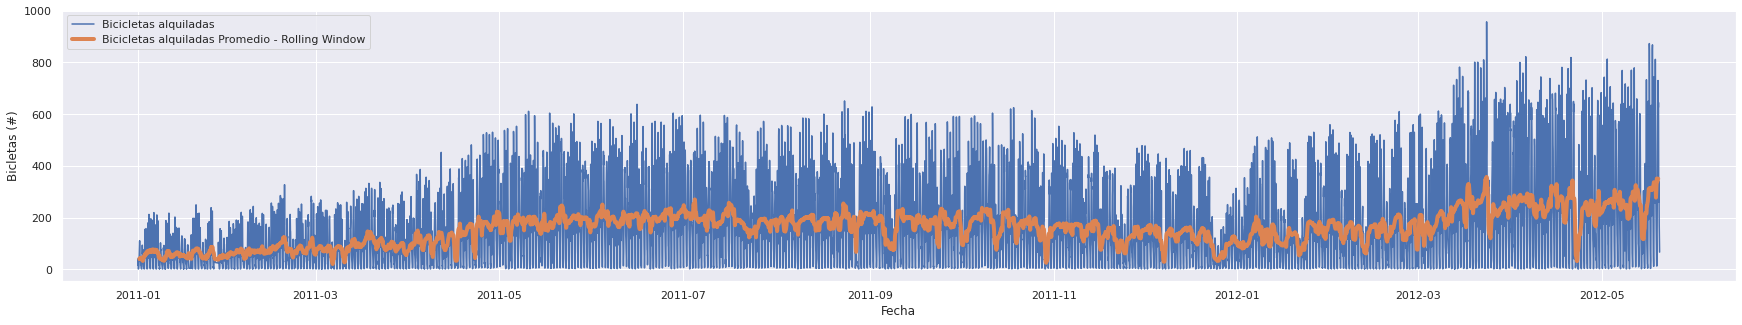

In [53]:
plt.figure(figsize=(30, 5))
plt.plot(dt_bikes.index, dt_bikes.cnt, label='Bicicletas alquiladas')
plt.plot(dt_bikes_tendencia, lw=4, label='Bicicletas alquiladas Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Bicletas (#)')
plt.legend()
plt.show()

<font color='lightblue'>***Tendencia lineal***

Ajustaremos una regresión lineal a la serie. 

Como primer paso, no podemos utilizar una regresión lineal con el tipo de fechas que tenemos, por lo que habrá que pasarlas a un formato numérico.</font>

In [54]:
dt_bikes['dteday_numeros'] = ((dt_bikes.index.year*100+dt_bikes.index.month)*100+dt_bikes.index.day)*100+dt_bikes.index.hour


In [55]:
dt_bikes.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_numeros
dteday,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011010100
2011-01-01 01:00:00,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011010101
2011-01-01 02:00:00,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011010102
2011-01-01 03:00:00,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011010103
2011-01-01 04:00:00,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011010104


<font color='lightblue'>Instanciamos el modelo y lo entrenamos.</font>

In [56]:
from sklearn.linear_model import LinearRegression

reg_lineal = LinearRegression() 
reg_lineal.fit(dt_bikes.dteday_numeros.values.reshape(-1, 1),   dt_bikes.cnt)


LinearRegression()

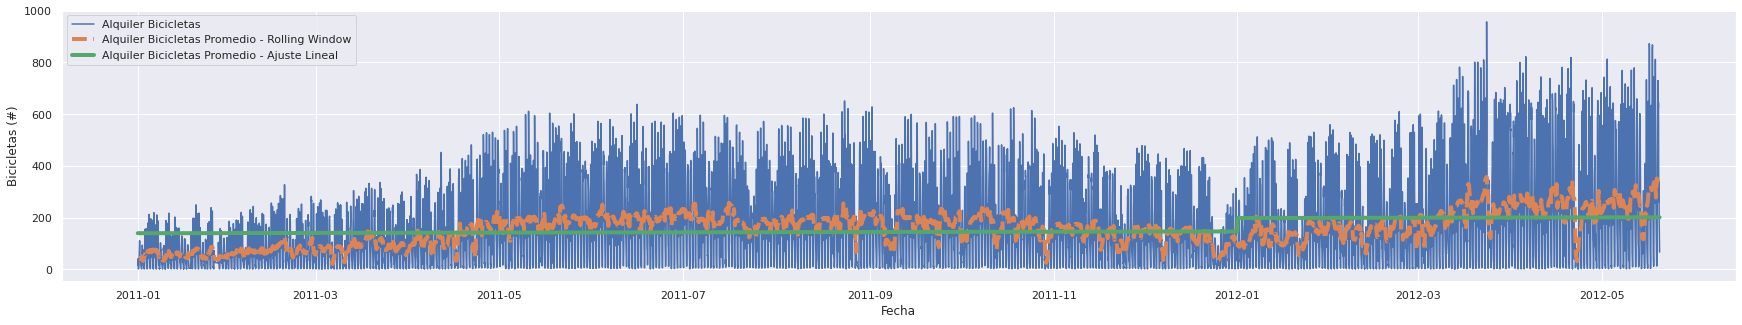

In [57]:
plt.figure(figsize=(30, 5))

plt.plot(dt_bikes.index, dt_bikes.cnt, label='Alquiler Bicicletas')
plt.plot(dt_bikes_tendencia, ls='--', lw=4, label='Alquiler Bicicletas Promedio - Rolling Window')
plt.plot(dt_bikes.index, reg_lineal.predict(dt_bikes.dteday_numeros.values.reshape(-1, 1)), lw=4, label='Alquiler Bicicletas Promedio - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Bicicletas (#)')
plt.legend()
plt.show()


## <font color='lightblue'>***2. Componentes de la curva***</font>

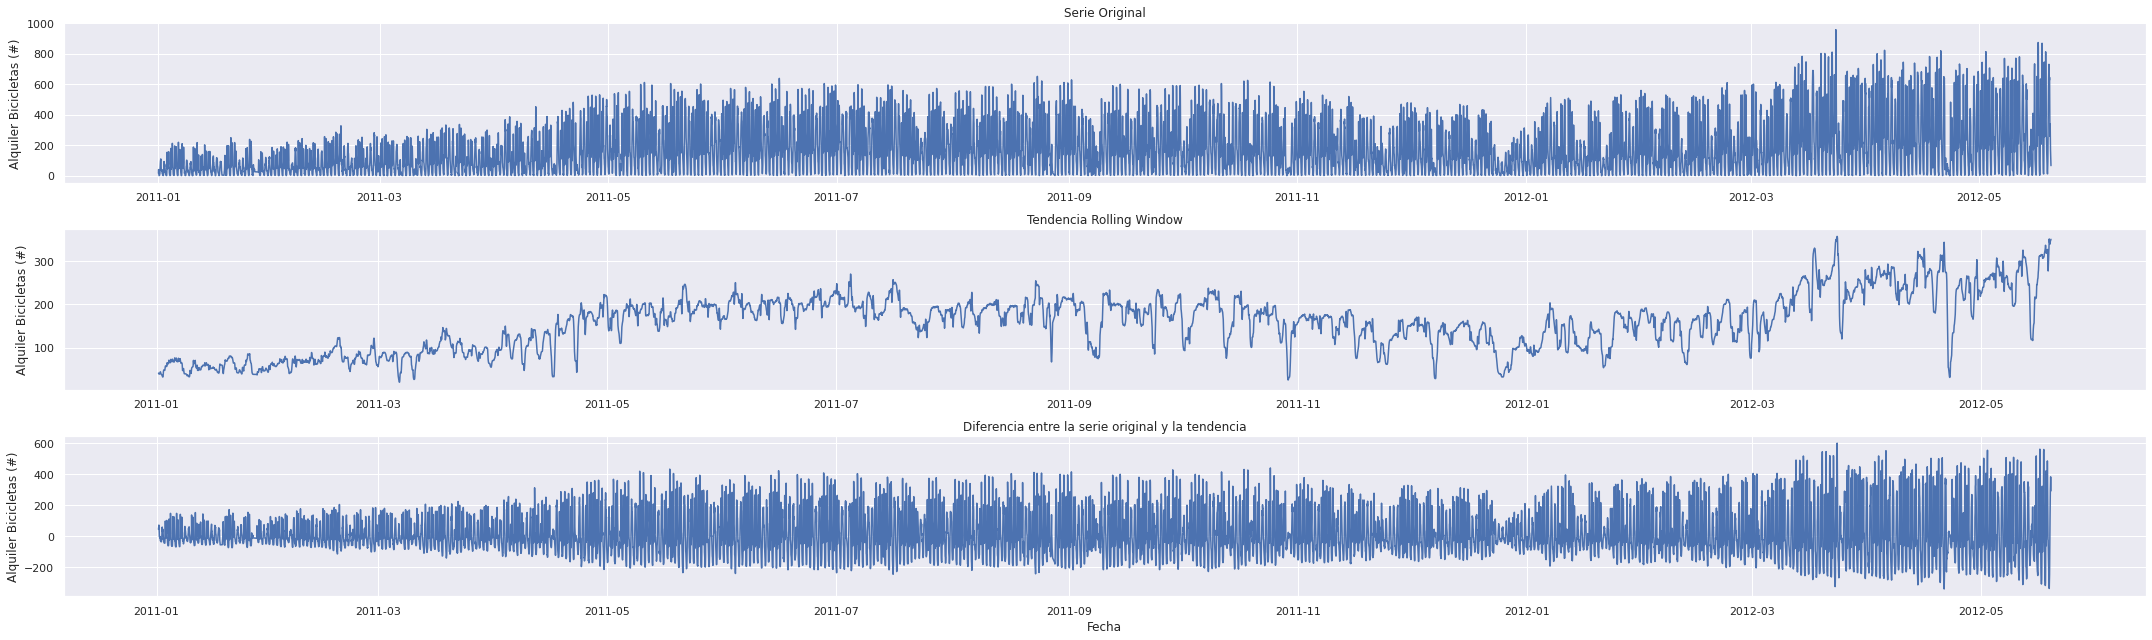

In [58]:
plt.figure(figsize=(30, 9))

plt.subplot(3, 1, 1)
plt.title('Serie Original')
plt.plot(dt_bikes.index, dt_bikes.cnt)
plt.ylabel('Alquiler Bicicletas (#)')

plt.subplot(3, 1, 2)
plt.title('Tendencia Rolling Window')
plt.plot(dt_bikes_tendencia)
plt.ylabel('Alquiler Bicicletas (#)')

plt.subplot(3, 1, 3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(dt_bikes.index, dt_bikes.cnt - dt_bikes_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Alquiler Bicicletas (#)')

plt.tight_layout()
plt.show()


<font color='lightblue'>***Uso de la libreria statmodel como alternativa***</font>

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dt_bikes.cnt,period=24,model='additive')

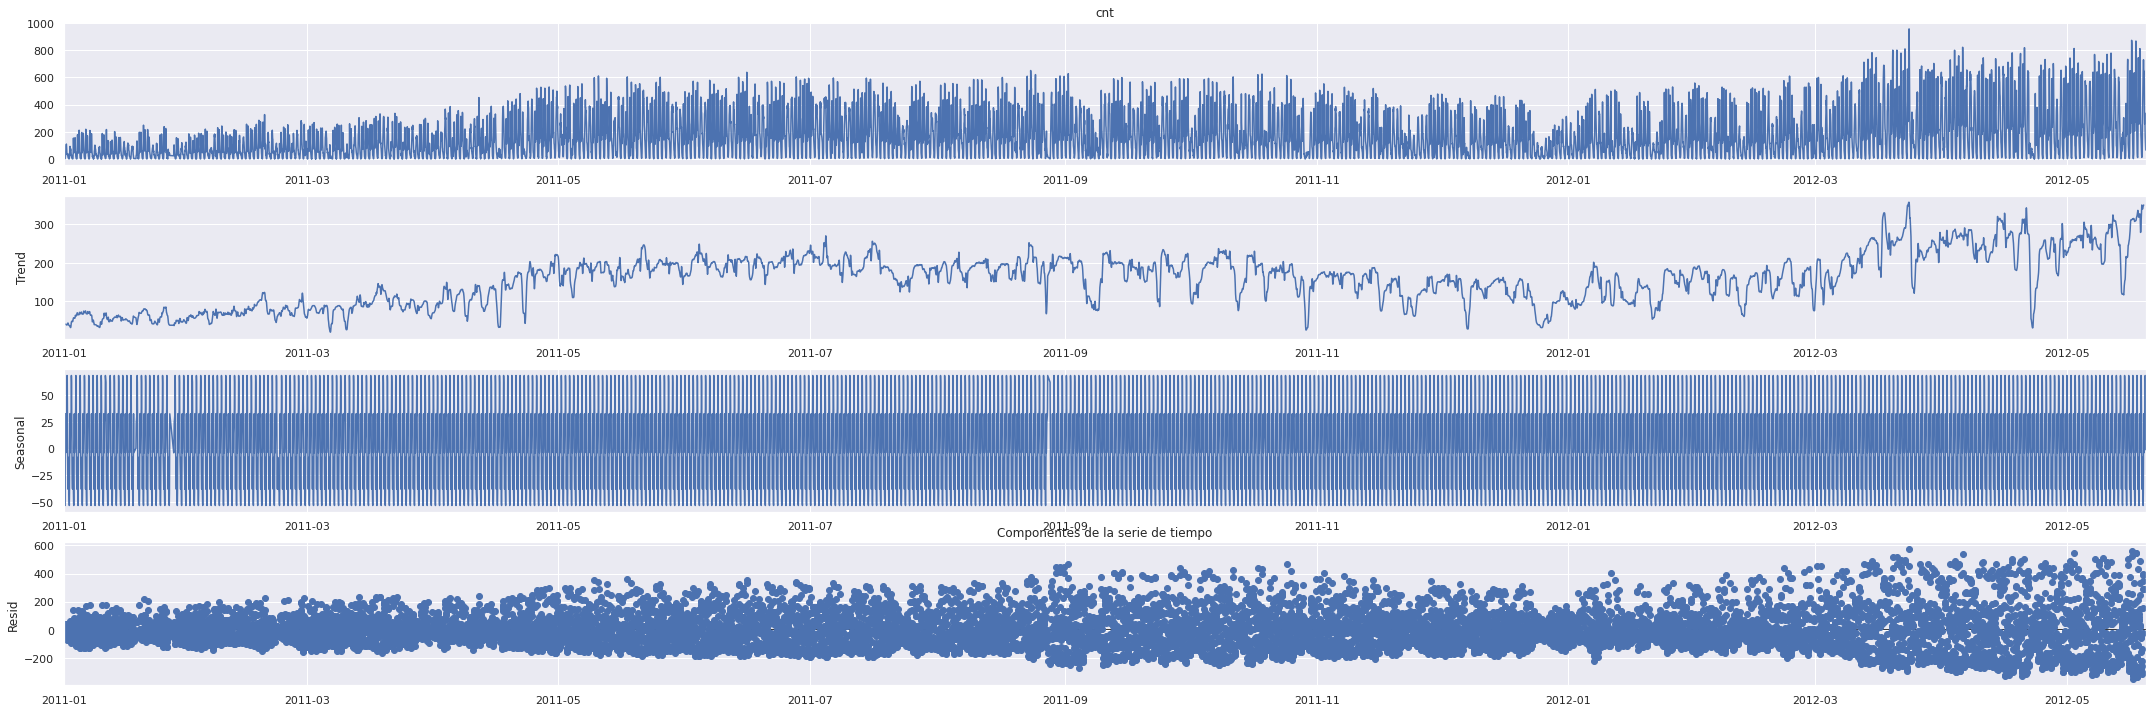

In [60]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [30, 10]
result.plot()
plt.title('Componentes de la serie de tiempo')
plt.show()


<font color='lightblue'>***Estacionalidad***

En este caso, agrupamos los datos por mes y mostramos las distribuciones de cada grupo. De esta manera, se visualiza la estacionalidad anual. 
Podría buscarse, también, una estacionalidad mensual y agrupar los datos por día. 
Todo eso depende de los datos con los que estemos trabajando. 
Aquí, como estamos trabajando con alquiler de biciletas, al observar una estacionalidad anual podemos corroborar el patrón y la incidenciade las 4 estaciones del año en el alquiler promedio.
</font>

Text(0, 0.5, 'Alquiler Bicicletas (#)')

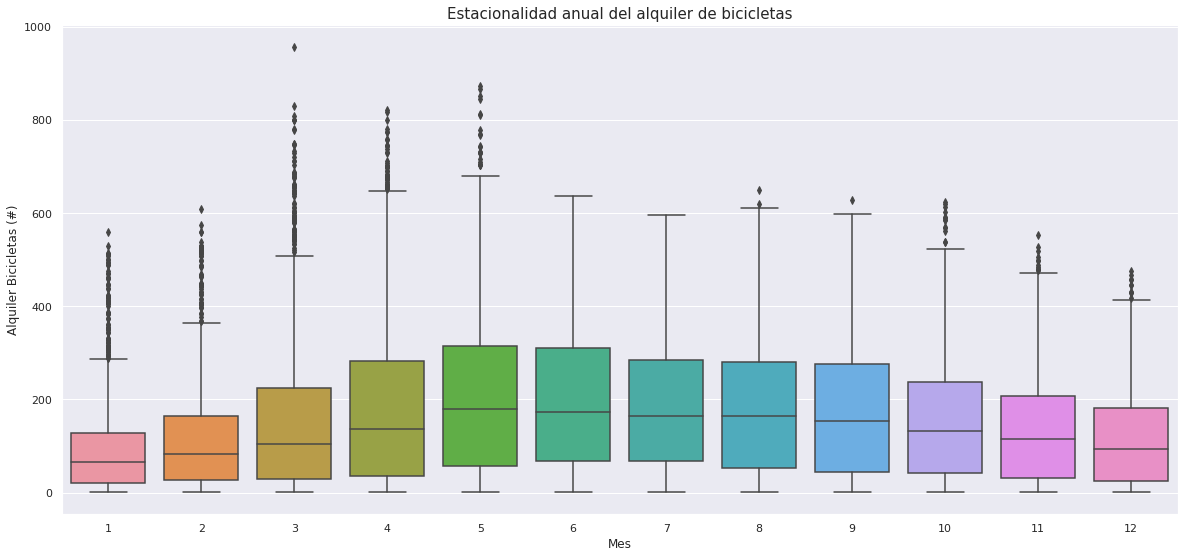

In [61]:
plt.figure(figsize=(20, 9))
sns.boxplot(data=dt_bikes, x=dt_bikes.index.month, y=dt_bikes.cnt)
plt.title('Estacionalidad anual del alquiler de bicicletas', fontsize=15)
plt.xlabel('Mes')
plt.ylabel('Alquiler Bicicletas (#)')


 ## <font color='lightblue'>**3. Forecast con Prophet** </font>

<font color='lightblue'>Prophet utiliza un modelo de regresión aditiva para descomponer la serie temporal en varios componentes: la tendencia, la estacionalidad, los festivos y el error:

$$y(t) = g(t) + s(t) + h(t) + e(t)$$

- $g(t)$ es la tendencia, que representa los cambios no periódicos que se modelizarán asumiendo una relación lineal o logística.

- $s(t)$ es la estacionalidad, que representa cambios periódicos: semanales, mensuales, anuales, etc.

- $h(t)$ es el efecto de los festivos, que pueden aparecer de manera irregular y tener una duración de 1 día o más.

- $e(t)$ es el término de error, que representa cambios *idiosincrásicos* que no se pueden acomodar al modelo. Se asume que estos errores deben tener una distribución normal.


Prophet utiliza el ajuste de curvas para descomponer las series de tiempo, teniendo en cuenta la estacionalidad en múltiples escalas de tiempo, efectos de vacaciones, puntos de cambio abruptos y tendencias a largo plazo.
</font>

In [62]:
from prophet import Prophet

<font color='lightblue'>**Prophet trabaja la columna fecha con el nombre 'ds' y la columna con las etiquetas con el nombre 'y'**</font>

In [63]:
dt_bikes.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_numeros
dteday,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011010100
2011-01-01 01:00:00,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011010101
2011-01-01 02:00:00,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011010102
2011-01-01 03:00:00,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011010103
2011-01-01 04:00:00,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011010104


In [64]:
dt_bikes.reset_index(level=0, inplace=True)
dt_bikes.rename(columns={'index': 'ds', 'cnt': 'y'}, inplace=True)
dt_bikes.drop(columns=['instant', 'season', 'yr', 'mnth','hr', 'holiday', 'weekday', 'workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','dteday_numeros'], inplace=True)
dt_bikes.rename(columns={'dteday': 'ds', 'y': 'y'}, inplace=True)


In [74]:
dt_bikes.head()

,ds,y
0,2011-01-01 00:00:00,16
1,2011-01-01 01:00:00,40
2,2011-01-01 02:00:00,32
3,2011-01-01 03:00:00,13
4,2011-01-01 04:00:00,1


In [75]:
dt_bikes.tail()

,ds,y
11994,2012-05-19 23:00:00,239
11995,2012-05-20 00:00:00,170
11996,2012-05-20 01:00:00,130
11997,2012-05-20 02:00:00,98
11998,2012-05-20 03:00:00,66


In [71]:
# Instanciamos un modelo de Prophet
prophet = Prophet(yearly_seasonality=True, uncertainty_samples=50, mcmc_samples=24, interval_width=0.6)

# Entrenamos el modelo
prophet.fit(dt_bikes)

# Construimos un dataframe con los x valores futuros que querámos predecir. En este caso, desde el 20 de Mayo hasta el 31 de Diciembre.
build_forecast = prophet.make_future_dataframe(periods=(104*52), freq='H')

# Predecimos
forecast = prophet.predict(build_forecast)


13:50:08 - cmdstanpy - INFO - CmdStan installation /home/toor/.local/lib/python3.8/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
13:50:08 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
13:50:08 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

13:50:15 - cmdstanpy - INFO - CmdStan done processing.
13:50:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, bu

In [79]:
build_forecast.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17407 entries, 0 to 17406
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      17407 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 136.1 KB


In [80]:
build_forecast.to_csv('./build_forecast.csv')

<font color='lightblue'>**Ploteamos la curva de forecast**</font>

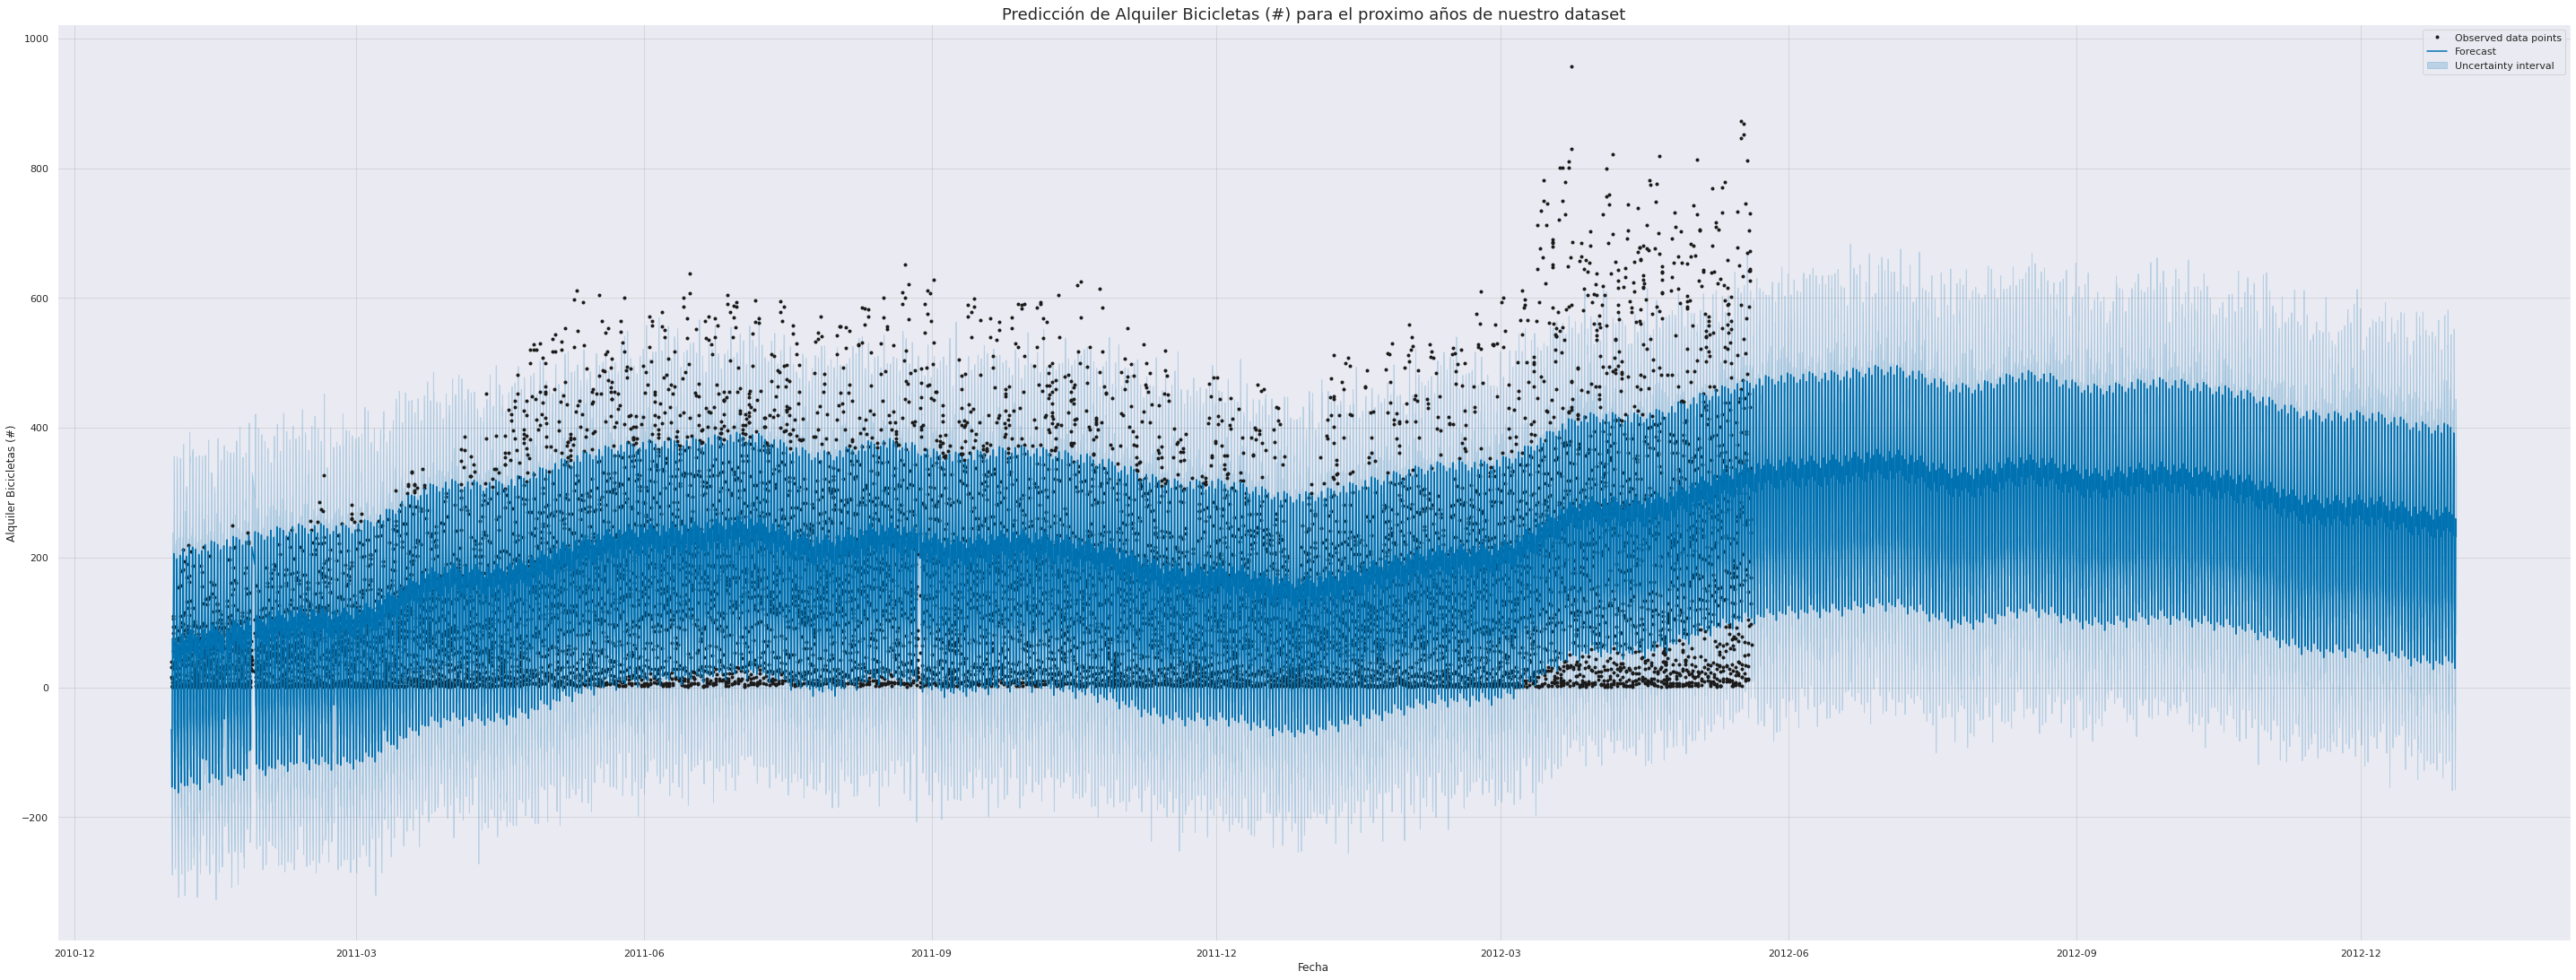

In [72]:
prophet.plot(forecast, xlabel='Fecha',
             ylabel='Alquiler Bicicletas (#)', figsize=(40, 15))
plt.title('Predicción de Alquiler Bicicletas (#) para el proximo años de nuestro dataset', fontsize=18)
plt.legend()
plt.show()


In [74]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
17402,2012-12-31 07:00:00,295.282520,119.149700,379.184315,264.834817,323.412555,-57.440759,-68.398066,-45.869336,22.025340,...,-8.782286,-13.316278,-5.601461,-70.683813,-80.310475,-62.799096,0.0,0.0,0.0,237.841761
17403,2012-12-31 08:00:00,295.294414,122.656870,398.451050,264.843165,323.428936,-26.709886,-37.667895,-21.459962,52.464426,...,-8.519531,-12.893940,-5.271489,-70.654781,-80.300078,-62.733922,0.0,0.0,0.0,268.584528
17404,2012-12-31 09:00:00,295.306307,132.875113,389.250325,264.851512,323.445318,-29.613877,-37.354070,-24.378332,49.226060,...,-8.214197,-12.412949,-4.911610,-70.625740,-80.289333,-62.669174,0.0,0.0,0.0,265.692431
17405,2012-12-31 10:00:00,295.318201,177.596358,409.207763,264.859860,323.461700,-45.809567,-55.204723,-40.198015,32.653987,...,-7.866865,-11.878603,-4.521423,-70.596689,-80.278241,-62.604854,0.0,0.0,0.0,249.508634
17406,2012-12-31 11:00:00,295.330095,139.780507,389.158324,264.868208,323.478082,-56.389470,-69.162901,-45.888826,21.656648,...,-7.478489,-11.296594,-4.100817,-70.567630,-80.266803,-62.540962,0.0,0.0,0.0,238.940625


In [76]:
forecast.to_csv('./bike_forecast.csv')

<font color='lightblue'>**Ploteamos los componentes de la curva con la misma herramienta**</font>

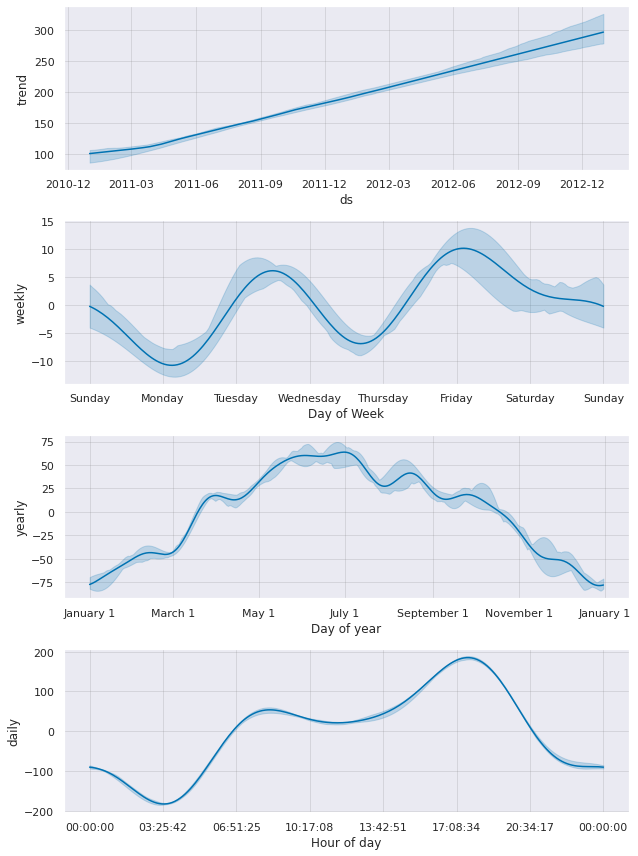

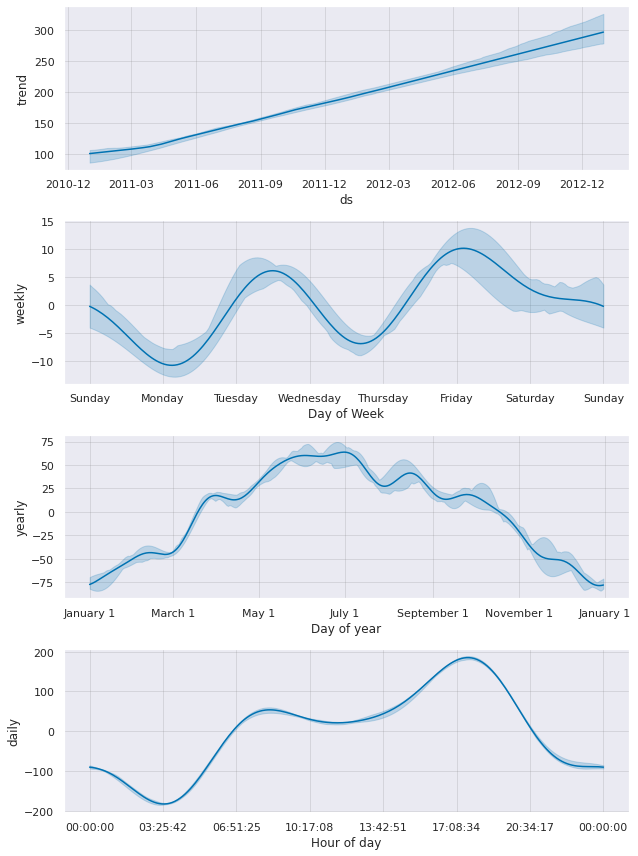

In [78]:
prophet.plot_components(forecast)


In [89]:
forecast[]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01 00:00:00,100.253693,-212.601736,32.925528,85.617718,106.015503,-165.101930,-169.098961,-161.739565,-90.375992,...,2.916444,-1.181264,4.683936,-77.642383,-81.474828,-70.152543,0.0,0.0,0.0,-64.848237
1,2011-01-01 01:00:00,100.258929,-236.374016,36.638331,85.624243,106.018305,-182.351041,-189.101126,-178.823739,-107.353381,...,2.624305,-1.195692,4.672745,-77.621964,-81.510178,-70.045162,0.0,0.0,0.0,-82.092112
2,2011-01-01 02:00:00,100.264164,-274.916963,27.795692,85.630769,106.021107,-219.941984,-231.321466,-212.956076,-144.701625,...,2.360990,-1.150144,4.693998,-77.601349,-81.545326,-69.937428,0.0,0.0,0.0,-119.677820
3,2011-01-01 03:00:00,100.269400,-285.143232,-33.154948,85.637294,106.023908,-253.750905,-262.356297,-248.391593,-178.297120,...,2.126753,-1.046367,4.496793,-77.580538,-81.580271,-69.844106,0.0,0.0,0.0,-153.481505
4,2011-01-01 04:00:00,100.274636,-288.368237,-6.121868,85.643819,106.026710,-251.460053,-256.473890,-247.095319,-175.821797,...,1.921276,-0.886953,4.048194,-77.559532,-81.615013,-69.809779,0.0,0.0,0.0,-151.185417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17402,2012-12-31 07:00:00,296.155837,157.697752,444.831027,278.087238,325.642012,-69.295713,-77.507491,-60.953271,18.589734,...,-10.143951,-12.417654,-6.809293,-77.741496,-81.295086,-70.530376,0.0,0.0,0.0,226.860124
17403,2012-12-31 08:00:00,296.167986,158.641385,408.179257,278.097114,325.661455,-36.386540,-49.575937,-26.873252,51.162637,...,-9.827103,-12.171023,-6.615066,-77.722074,-81.331431,-70.489313,0.0,0.0,0.0,259.781446
17404,2012-12-31 09:00:00,296.180134,130.725192,383.157160,278.106990,325.680897,-37.280898,-49.283516,-29.820529,49.865080,...,-9.443527,-11.856624,-6.381741,-77.702451,-81.367578,-70.448214,0.0,0.0,0.0,258.899236
17405,2012-12-31 10:00:00,296.192283,81.584800,354.268716,278.116866,325.700340,-52.515417,-59.191640,-44.957953,34.162850,...,-8.995640,-11.474854,-6.109966,-77.682627,-81.403528,-70.366234,0.0,0.0,0.0,243.676865


In [93]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17407 entries, 0 to 17406
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          17407 non-null  datetime64[ns]
 1   trend                       17407 non-null  float64       
 2   yhat_lower                  17407 non-null  float64       
 3   yhat_upper                  17407 non-null  float64       
 4   trend_lower                 17407 non-null  float64       
 5   trend_upper                 17407 non-null  float64       
 6   additive_terms              17407 non-null  float64       
 7   additive_terms_lower        17407 non-null  float64       
 8   additive_terms_upper        17407 non-null  float64       
 9   daily                       17407 non-null  float64       
 10  daily_lower                 17407 non-null  float64       
 11  daily_upper                 17407 non-null  float64   

In [103]:
forecast_csv = pd.DataFrame(forecast[forecast.ds >= "2012-05-20 00:00:00"].yhat)
forecast_csv.rename(columns={'yhat': 'pred'}, inplace=True)


In [104]:
forecast_csv.to_csv('./t66543.csv',index=False)